- RNN-GAN - fourier-transformed audiodata - complex number values

In [1]:
import numpy as np
import tensorflow.keras as keras
import pandas as pd
import matplotlib.pyplot as plt
import librosa
import soundfile as sf

Add path to util-functions

In [2]:
#add utils-folder as import-option
import sys
sys.path.append('D:/1. Studium/7. Semester/BA/Birdvoice/utils')

The Paths to the FT-databases

In [3]:
databasePathsParusMajor=['../../../../dataPreprocessing/databases/ft/parusMajor/ParusMajorSongFT1.csv', '../../../../dataPreprocessing/databases/ft/parusMajor/ParusMajorSongFT5.csv']
databasePathsTurdusMerula=['../../../../dataPreprocessing/databases/ft/turdusMerula/TurdusMerulaSongFT5.csv']
databasePathsCorvusCorone=['../../../../dataPreprocessing/databases/ft/corvusCorone/CorvusCoroneCallFT5.csv']

Load data from chosen path

In [4]:
readSampleCount = 500

#number of columns per dataset-sample for
ONE_SECOND = 22
FIVE_SECONDS = 108

#load and reshape data
x_train = pd.read_csv(databasePathsTurdusMerula[0], header=None, delimiter=',', index_col=None, nrows=readSampleCount).to_numpy()
x_train = np.reshape(x_train, [readSampleCount, 1025, FIVE_SECONDS])

#parse to complex128-datatype
x_train = x_train.astype('complex128')

_, AUDIO_ROWS, AUDIO_COLS = x_train.shape

Create optimizer

In [5]:
optimiser = keras.optimizers.Adamax(0.001, 0.9)

Create the discriminator

In [6]:
from utils.discriminatorsFT import *

In [7]:
discriminator = buildDiscriminator1(AUDIO_ROWS, AUDIO_COLS)
discriminator.compile(loss = "binary_crossentropy",
                      optimizer = optimiser,
                      metrics = "accuracy")

Create the generator and GAN

In [8]:
from utils.generatorsFT import *

In [9]:
generator = buildGenerator4(AUDIO_ROWS, AUDIO_COLS)
discriminator.trainable = False
gan = keras.models.Sequential( [generator, discriminator] )
gan.compile(loss="binary_crossentropy",
           optimizer = optimiser,
           metrics = "accuracy")


Run the training:

In [10]:
from utils.trainingFT import trainFT

In [11]:
ITERATIONS = 50
BATCH_SIZE = 1

trainFT(iterations=ITERATIONS, batch_size=BATCH_SIZE, generator=generator, discriminator=discriminator, network=gan, data=x_train, columnCount=AUDIO_COLS)

Iteration: 0
1/1 [==============================] - 6s 6s/step
d_loss_real: {'loss': 0.7012858986854553, 'accuracy': 0.00585365854203701}
d_loss_gen: {'loss': 0.6955889463424683, 'accuracy': 0.0019512195140123367}
g_loss: [0.691026508808136, 0.0009756097570061684]
Iteration: 1
1/1 [==============================] - 5s 5s/step
d_loss_real: {'loss': 0.6937896609306335, 'accuracy': 0.0019512195140123367}
d_loss_gen: {'loss': 0.6969134211540222, 'accuracy': 0.0}
g_loss: [0.6898535490036011, 0.0]
Iteration: 2
1/1 [==============================] - 5s 5s/step
d_loss_real: {'loss': 0.6986430883407593, 'accuracy': 0.002926829271018505}
d_loss_gen: {'loss': 0.6994305849075317, 'accuracy': 0.0}
g_loss: [0.6880012154579163, 0.0]
Iteration: 3
1/1 [==============================] - 5s 5s/step
d_loss_real: {'loss': 0.6910727620124817, 'accuracy': 0.002926829271018505}
d_loss_gen: {'loss': 0.7118635177612305, 'accuracy': 0.0}
g_loss: [0.6834796071052551, 0.0]
Iteration: 4
1/1 [=======================

Test of generator after training

1/1 [==============================] - 5s 5s/step


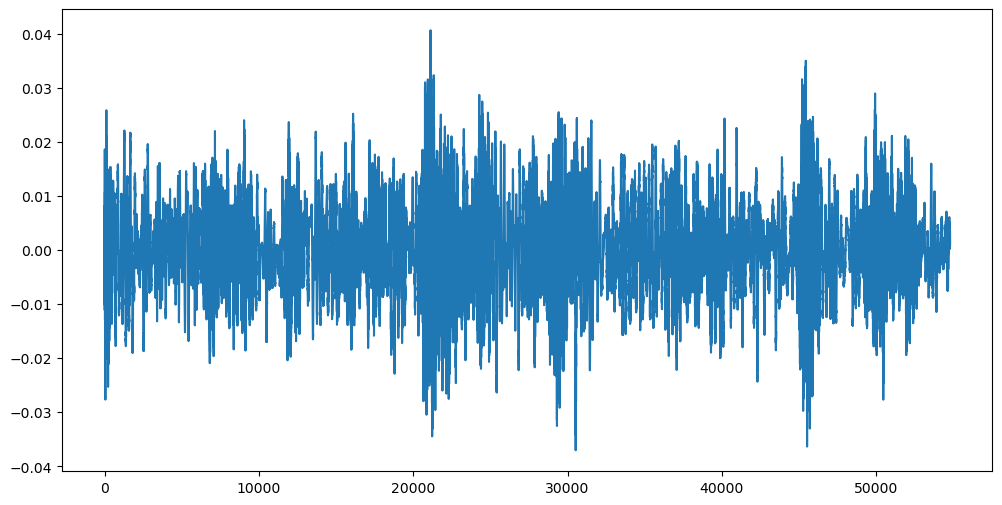

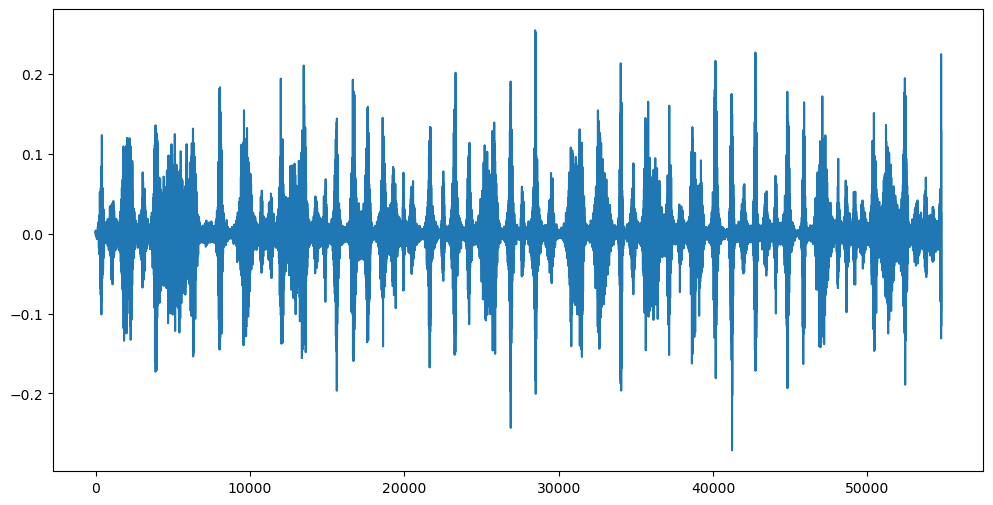

In [12]:
noise = np.random.normal(0,0.1, (1, 1025, FIVE_SECONDS))  
fake_audios = generator.predict(noise)

glAudio = librosa.griffinlim(fake_audios[0])
istftAudio = librosa.istft(fake_audios[0])

plt.figure(figsize=(12, 6))
plt.plot(istftAudio*50)

plt.figure(figsize=(12, 6))
plt.plot(glAudio)

In [13]:
sf.write("tm5g4d1gen.wav", istftAudio, 11025)
sf.write("tm5g4d1gl.wav", glAudio, 11025)